In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import cv2
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='t10k')

labelNames = ["0", "1", "2", "3", "4",
	"5", "6", "7", "8", "9"]

X_train=X_train.reshape(-1,28,28).astype('float32') /255.0
X_test=X_test.reshape(-1,28,28).astype('float32') /255.0

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test))) 

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [0]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the image, convert it to grayscale, and extract LBP features
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(y_train[img_index])
	data_train.append(hist)

In [12]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_train, labels_train)

print(np.shape(data_train))
print(np.shape(labels_train))
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

(60000, 26)
(60000,)
Train set Accuracy: 0.65


In [7]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(X_test)):
  imag = X_test[im_index]
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  # Perform classification
  prediction = model.predict(histo.reshape(1, -1))
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy on test dataset:",accuracy) 

Accuracy on test dataset: 0.4342


[[ 868    0   10   23    6   44    4    1    4   20]
 [   0 1097    8    3    0    3    2   18    4    0]
 [  42   13  516  144   77   45   43   82   59   11]
 [  49   12  245  312   91   97   65   46   63   30]
 [  20    8  166  134  345   53   41   24   49  142]
 [ 137   16  177  190   63  126   44   75   30   34]
 [  63   11  267  179   81   71   95   47   81   63]
 [  22   63  158  126   73   86   39  423   12   26]
 [  46    5  175  181   79   29   75   18  333   33]
 [  64   23   66  176  232   70   89   25   37  227]]


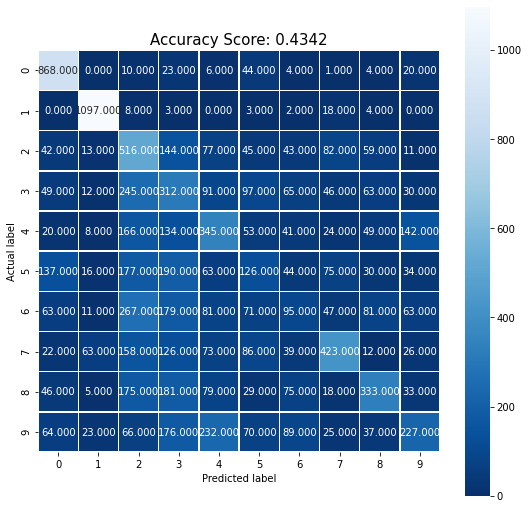

In [8]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [0]:
# Display the some classification result on test samples
images = []
 
# randomly select a few testing numbers
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the number
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

  np.shape(images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


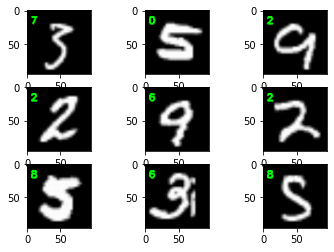

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(3,3,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(3,3,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(3,3,4)
ax4.imshow(images[4])
ax5 = fig.add_subplot(3,3,5)
ax5.imshow(images[5])
ax6 = fig.add_subplot(3,3,6)
ax6.imshow(images[6])
ax7 = fig.add_subplot(3,3,7)
ax7.imshow(images[7])
ax8 = fig.add_subplot(3,3,8)
ax8.imshow(images[8])
ax9 = fig.add_subplot(3,3,9)
ax9.imshow(images[9])